# PJ01 - Choose Your Own Analysis

## Hypotheses: We can see trends in a students programming experience ("prior_exp", "prior_time", "languages") and major that correlate to how they view this class and their experience in it.

# 10 points - First markdown cell in your notebook states your hypothesis or question of interest

Borrowing some basic setup steps from ex04.data_wrangling.ipynb

Step 1: Come up with a question you would like to explore.

Step 2: Outline the steps needed to test this hypothesis or investigate this question.

Step 3. Perform the data analysis

Step 4: Evaluate your findings. Was your prediction correct? What can you learn from your results? Do your findings present any new questiosn for a future exploration?



In [1]:
__author__ = "730366999"

Implementing the utility functions for this exercise in the `data_utils.py` file found in the `projects/pj01` directory. Since your Jupyter Notebook _kernel_ is running the entire time you are working on functions in `data_utils.py`, we will use a special extension to automatically reload any changes you make _and save_ in modules you import. The special conventions in the cell below are turning this feature on.

In [2]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


Data files will be stored in the `data` directory of the workspace. This Notebook is located in `projects/pj01` directory. If you think of how to _navigate_ from this directory to the `data` directory, you would need to go "two directories up" and then "into the `data` directory". The constant `DATA_DIRECTORY` defined below uses the convention of two dots to refer to "one directory up", so it is a `str` that references the `data` directory _relative_ to this exercise's directory.

Then, another constant is established referencing the path to the data file you will use to test your functions in this exercise.

In [3]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

# 25 points - Import and make use of the read_csv_rows, head, columnar, select, count functions from ex04.

In [4]:
from data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)


print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
502 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


## Convert lines of data to a column based datastructure.

In [5]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

if len(data_cols.keys()) == 0:
    print("Complete your implementation of columnar in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"{len(data_cols.keys())} columns")
    print(f"Columns names: {data_cols.keys()}")

36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


# Define some new columns

## The ratings are very specific, and not every student has used every available resource, so want to define some more generalized metrics about their experience and effectiveness of the class.

overall_experience - This is an average of "pace", "difficulty", "understanding", "interested", "valuable", and "would_recommend".  The purpose here is to try to capture a subjective metric of how the student feels about the class.

overall_effective - This is an average of "ls_effective", "lsqs_effective", "programming_effective", "qz_effective", "oh_effective", "tutoring_effective", and "kaki_effective".  The purpose here is to have an overall rating of the class.




In [6]:
from data_utils import select, head, count, average_columns
from tabulate import tabulate


selected_data: dict[str, list[str]] = select(data_cols, ["pace", "difficulty", "understanding", "interested", "valuable", "would_recommend"])

data_cols["overall_experience"] = average_columns(selected_data)  # Add to our working data table.
selected_data["overall_experience"] = average_columns(selected_data)  # Add to selected data for a preview.


tabulate(head(selected_data, 10), selected_data.keys(), "html")

pace,difficulty,understanding,interested,valuable,would_recommend,overall_experience
5,5,5,7,7,6,5.83333
7,7,3,7,7,7,6.33333
7,7,3,7,7,7,6.33333
4,4,5,5,6,6,5
3,5,5,4,5,4,4.33333
4,3,5,6,6,7,5.16667
4,2,6,6,7,6,5.16667
7,7,3,5,7,3,5.33333
4,2,5,5,5,6,4.5
5,3,6,5,4,5,4.66667


In [7]:
from data_utils import select, head, count, average_columns
from tabulate import tabulate


selected_data: dict[str, list[str]] = select(data_cols, ["ls_effective", "lsqs_effective", "programming_effective", "qz_effective", "oh_effective", "tutoring_effective", "kaki_effective"])

data_cols["overall_effective"] = average_columns(selected_data)  # Add to our working data table.
selected_data["overall_effective"] = average_columns(selected_data)  # Add to selected data for a preview.

tabulate(head(selected_data, 10), selected_data.keys(), "html")

ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,overall_effective
3,5,3,4,7,3,4,4.14286
5,2,3,7,7,,7,5.16667
5,2,3,7,7,,7,5.16667
6,6,6,6,,,7,6.2
4,5,6,4,,,,4.75
6,6,6,6,,,,6
5,3,6,6,,,,5
7,5,5,4,6,,5,5.33333
5,5,7,4,5,5,5,5.14286
6,6,7,5,,,6,6


### Statistics of comma seperated list of values like languages or prereqs

This will give a distribution of how many students have taken a language or prereq.

In [8]:

from data_utils import csv_in_column_distribution

print("Distribution of prereqs taken:")
list_csv: list[str] = data_cols["prereqs"]

breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in breakdown.keys():
    print(f"{breakdown[item]} students have taken {item}")

print("\n\n\nDistribution of languages taken:")

list_csv = data_cols["languages"]

breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in breakdown.keys():
    print(f"{breakdown[item]} students have taken {item}")





Distribution of prereqs taken:
474 students have taken MATH 231
288 students have taken MATH 232
157 students have taken MATH 233
238 students have taken STOR 155
159 students have taken MATH 130
20 students have taken STOR 120
66 students have taken STOR 151
33 students have taken MATH 347
71 students have taken MATH 381
224 students have taken MATH 129P
80 students have taken PSYC 210
20 students have taken STOR 113
5 students have taken STOR 112
28 students have taken MATH 152
23 students have taken MATH 210
4 students have taken PHIL 155 STOR 155
3 students have taken PSYC 215
1 students have taken PHIL 155 - Truth and Proof
1 students have taken PHIL 155 STOR 151



Distribution of languages taken:
163 students have taken Python
40 students have taken R / Matlab / SAS
6 students have taken Other
60 students have taken Java / C#
48 students have taken HTML / CSS
11 students have taken SQL
7 students have taken BASIC
25 students have taken C / C++
37 students have taken JavaScript /

### 25 points - Define at least one function that produces a mask based on some criteria. Reminder: For our purposes, a mask is a list[bool]. To get credit for this requirement, it must be a different function than the less_than one defined in this video. You are free to make use of the less_than function in your analysis, but you’ll need to come up with at least one function of your own.

# Add a column with the tally of languages taken, 0 if none. (uses a mask to do this.)

In [9]:
from data_utils import not_none_mask, csv_tally

languages: list[str] = data_cols["languages"]
language_mask: list[bool] = not_none_mask(languages)

language_count: list[str] = csv_tally(languages, language_mask)

data_cols["language_count"] = language_count
print(data_cols.keys())



dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend', 'overall_experience', 'overall_effective', 'language_count'])


# 10 points - Filter some data using this mask. You are free to use the masked function defined in class for this requirement.

## 10 points - Above and beyond! Produce 2 visuals. Could be a data table or a plot. The libraries mentioned in this video are a good place to start! Feel free to explore what is out there. (Note: above and beyond points are included in the total score. If you choose not to do this, you can still earn 90% credit, which is an A)

# 10 points - Final markdown cell is a conclusion paragraph summarizing your findings. Were you able to answer your question or prove your hypothesis? It is totally OK (and part of the process) to not get what you initially expected. You can still get full credit even if you end up contradicting your hypothesis :)

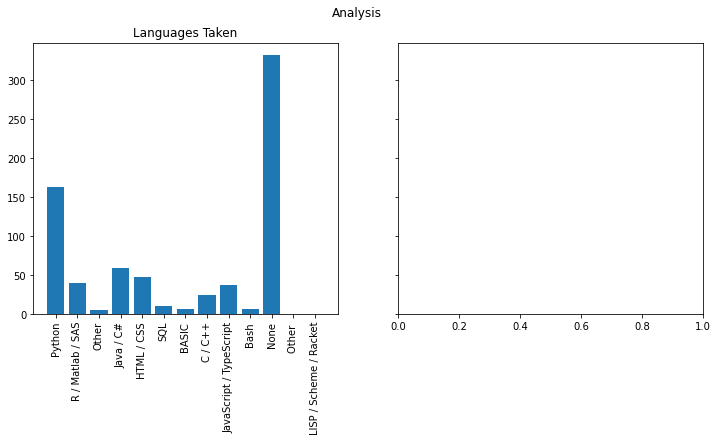

In [10]:


from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Analysis")


axes[0].set_title("Languages Taken")
axes[0].bar(breakdown.keys(), breakdown.values())
axes[0].tick_params(axis='x', labelrotation = 90)

# axes[1].set_title("By Sex")
# axes[1].bar(data_cols[language_count], data_cols[overall_experience])

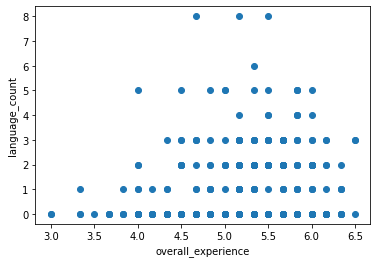

In [42]:
selected_data: dict[str, list[str]] = select(data_cols, ["overall_experience", "language_count"])
x_values: list[float] = []
y_values: list[float] = []

for item in selected_data["overall_experience"]:
    x_values.append(float(item))

for item in selected_data["language_count"]:
    y_values.append(float(item))


plt.scatter(x_values, y_values)
plt.xlabel("overall_experience")
plt.ylabel("language_count")
plt.show()

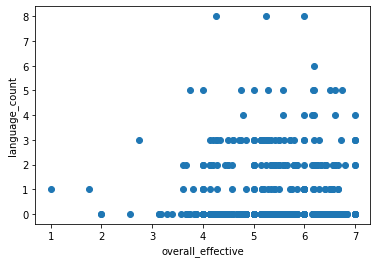

In [33]:
selected_data: dict[str, list[str]] = select(data_cols, ["overall_effective", "language_count"])
x_values: list[float] = []
y_values: list[float] = []

for item in selected_data["overall_effective"]:
    x_values.append(float(item))

for item in selected_data["language_count"]:
    y_values.append(float(item))


plt.scatter(x_values, y_values)
plt.xlabel("overall_effective")
plt.ylabel("language_count")
plt.show()

# Using seaborn for graphing? 

let's try some things.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

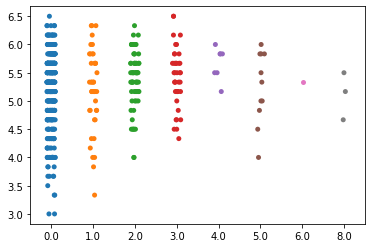

In [38]:
import seaborn

selected_data: dict[str, list[str]] = select(data_cols, ["overall_experience", "language_count"])
x_values: list[float] = []
y_values: list[float] = []

for item in selected_data["overall_experience"]:
    y_values.append(float(item))

for item in selected_data["language_count"]:
    x_values.append(float(item))

seaborn.stripplot(x_values, y_values)

